In [1]:
import json
from argparse import Namespace
from collections import Counter

args = Namespace(
    train_set = 'train.json'
)

In [2]:
dataset = {}
with open(args.train_set) as f:
    for id_, v in json.load(f).items():
        # {'claim': str, 'label': str, 'evidence': []}
        # label: SUPPORTS
        dataset[id_] = v

In [3]:
print("There are " + str(len(dataset)) + "training data")
labels = {}
supports_evidence = []
refutes_evidence = []
for id_, v in dataset.items():
    labels[v['label']] = labels.get(v['label'], 0) + 1
    if v['label'] == 'SUPPORTS':
        supports_evidence += [len(v['evidence'])]
    elif v['label'] == 'REFUTES':
        refutes_evidence += [len(v['evidence'])]

print("label distribution: ", labels)

There are 145449training data
label distribution:  {'SUPPORTS': 80035, 'REFUTES': 29775, 'NOT ENOUGH INFO': 35639}


Claims labeled as 'SUPPORTS' have 1.838083338539389 evidence in average


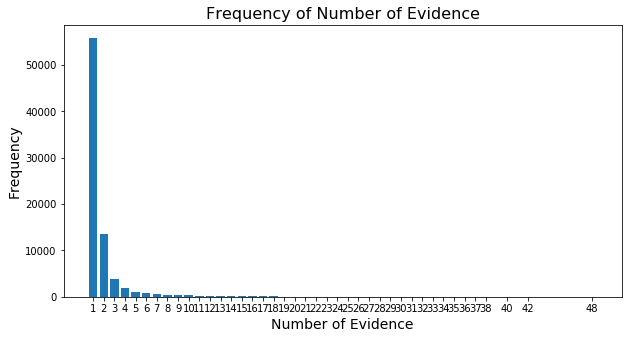

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

supports_evidence_dist = Counter(supports_evidence)
avg_supports_evidence = str(sum(supports_evidence) / labels['SUPPORTS'])
print("Claims labeled as 'SUPPORTS' have " + str(avg_supports_evidence) + " evidence in average")

plt.figure(figsize=(10,5))
plt.bar(list(supports_evidence_dist.keys()),
        list(supports_evidence_dist.values()),
        tick_label=list(supports_evidence_dist.keys()))
plt.title('Frequency of Number of Evidence', fontsize=16)
plt.xlabel('Number of Evidence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Claims labeled as 'REFUTES' have 1.9120067170445003 evidence in average


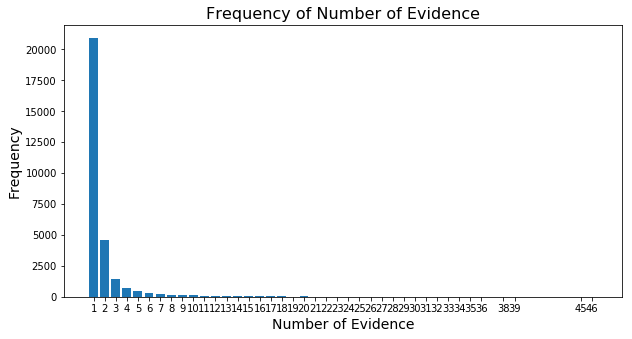

In [5]:
refutes_evidence_dist = Counter(refutes_evidence)
avg_refutes_evidence = str(sum(refutes_evidence) / labels['REFUTES'])
print("Claims labeled as 'REFUTES' have " + str(avg_refutes_evidence) + " evidence in average")

plt.figure(figsize=(10,5))
plt.bar(list(refutes_evidence_dist.keys()),
        list(refutes_evidence_dist.values()),
        tick_label=list(refutes_evidence_dist.keys()))
plt.title('Frequency of Number of Evidence', fontsize=16)
plt.xlabel('Number of Evidence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()